In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn import metrics

In [6]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [7]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [8]:
X = diabetes.data
Y = diabetes.target

In [21]:
df = pd.DataFrame(X, columns=["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"])
df['progression'] = diabetes['target']
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


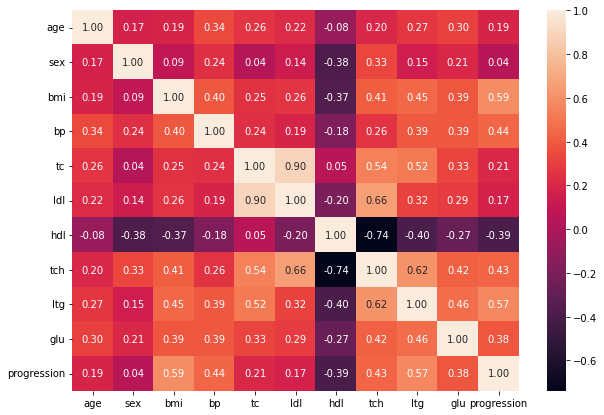

In [24]:
plt.figure(figsize=(10, 7))
dataplot = sns.heatmap(df.corr(), annot=True, fmt='.2f')


Text(0, 0.5, 'PROGRESSION')

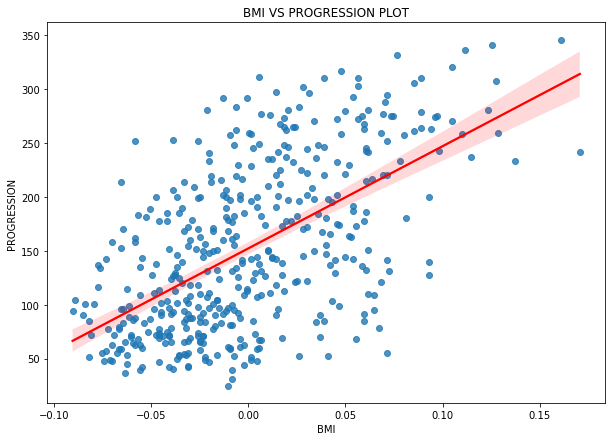

In [25]:
plt.figure(figsize=(10, 7))
sns.regplot(data=df, x='bmi', y='progression',line_kws={"color": "red"})
plt.title('BMI VS PROGRESSION PLOT')
plt.xlabel('BMI')
plt.ylabel('PROGRESSION')


In [26]:
X = df.iloc[:,:-1]
y = df['progression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

reg = LinearRegression().fit(X_train, y_train)

y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [27]:
#intercept
print(f'the intercept is:{reg.intercept_: .2f}')
#slope
print(f'the slope is:{reg.coef_}')
#R^2
print(f'Coeff. of determination on train set:{reg.score(X_train, y_train): .2f}') #train set
print(f'Coeff. of determination on test set:{reg.score(X_test, y_test): .2f}') #test set


the intercept is: 151.35
the slope is:[  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]
Coeff. of determination on train set: 0.53
Coeff. of determination on test set: 0.45


In [30]:
print(f'The mean absolute error is:{metrics.mean_absolute_error(y_test, y_test_pred): .2f}')
print(f'The root mean squared error is:{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)): .2f}')

The mean absolute error is: 42.79
The root mean squared error is: 53.85


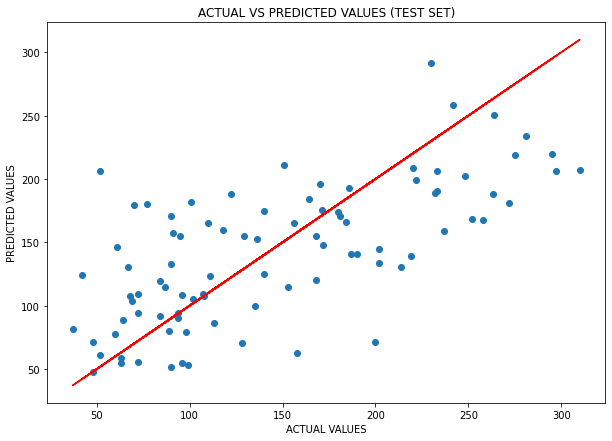

In [31]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color='r')
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
plt.show()

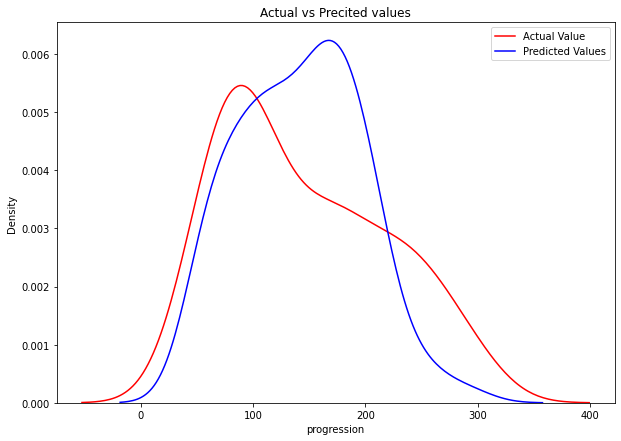

In [32]:
plt.figure(figsize=(10, 7))
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_test_pred, color="b", label="Predicted Values", ax=ax) #predicted values
plt.title('Actual vs Precited values')
plt.legend()
plt.show()